In [ ]:
# Owner:      Chilin Tang, Data & Analytics, Digitas Singapore, chilin.tang@digitas.com

# Solution:   Multiple linear regression, predicting dependent variable (y) from one/more dependent variables (x) through mix modeling such as MMM

# Date of publication:  25 March 2022

# Data requirements:  
#                     1) Relationship between dependent variable and independent variables is (approximately) linear
#                     2) Expected mean error of the regression model is zero
#                     3) Residuals are uncorrelated with each others (i.e. no multicollinearity)
#                     4) Errors (residuals) are normally distributed and have 0 population mean
#                     5) Residuals do not vary with x (i.e. constant variance, no heteroskedacticity)


In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
matplotlib.style.use('ggplot')
from sklearn import metrics
from sklearn import linear_model
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Fetch a single <10MB file using the raw GitHub URL.
!curl --remote-name \
-H 'Accept: application/vnd.github.v3.raw' \
--location https://raw.githubusercontent.com/Digitas-Singapore/Data-Analytics-Team/Chilin-Tang/DatasetMtcars25032022.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1816  100  1816    0     0  13255      0 --:--:-- --:--:-- --:--:-- 13255


In [3]:
# Load mtcars data set
mtcars = pd.read_csv("DatasetMtcars25032022.csv") #reads text data into data frame
# Open and read in data from osha.txt
# data_df  =  pandas.read_csv("osha.txt",delimiter="\t", header=None) #reads text data into data frame

In [14]:
#  Views the dataset of cars with diverse characteristics
mtcars

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [ ]:
#  Structure of mtcars dataset
#	 name	Model of Vehicle	The car types are a mix that includes sedans (Datsun, Ford, Honda,…), luxury sedans (Mercedes, Cadellac,..), muscle cars (Javelin, Challenger, Camero…) and high-end sports cars (Porsche, Lotus, Maserati, Ferrari…)
#  mpg	Miles/US Gallon	mpg is the determinant of fuel efficiency
#  cyl	Number of cylinders	Data includes vehicles with 4,6,8 cylinder engines.
#  disp	Displacement (cu.in.)	Displacement measures overall volume in the engine as a factor of cylinder circumfrance, depth and total number of cylinders. This metric gives a good proxy for the total amount of power the engine can generate.
#  hp	Gross horsepower	Gross horsepower measures the theoretical output of an engine’s power output; notably, gross rating is of the engine in an isolated environment outside any specific vehicle. When installed in a car, exhaust systems, carburetor, alternator, power systems, etc all influence the power that actually gets to the drive train. Moreover, according to online sources, in the early 1970s, regulatory changes influenced how gross horsepower was measured. As this dataset is from the early-mid 1970s, it’s unclear if hp metrics may be used as reliable comparators of engine power across models as it’s uncertain how manufacturers are reporting.
#  drat	Rear axle ratio	The rear axle gear ratio indicates the number of turns of the drive shaft for every one rotation of the wheel axle. A vehicle with a high ratio would provide more torque and thus more towing capability, for example. Transmission configuration can often influence a manufacturer’s gearing ratio.
#  wt	Weight (lb/1000)	The overall weight of the vehicle per 1000lbs (half US ton)
#  qsec	1/4 mile time	A performance measure, primarily of acceleration. Fastest time to travel 1/4 mile from standstill (in seconds).
#  vs	V/S	Binary variable signaling the engine cylinder configuration a V-shape (vs=0) or Straight Line (vs=1). V==0 and S==1. Configuration offers trade offs in power/torque, design usage in terms of space/size of engine and performance or center of gravity of vehicle. The geometry and placement of the engine, as influenced by its cylinder head, can have numerous knock-on influences on the vehicle beyond the technical engineering considerations of the cyliner angle.
#	 am	Transmission Type	A binary variable signaling whether vehicle has automatic (am=0) or manual (am=1) transmission configuration.
#  gear	Number of forward gears	Number of gears in the transmission. Manual transmissions have either 4 or 5 forward gears; Automatic either 3 or 4
#  carb	Number of carburetors	The number of carburetor barrels. Engines with higher displacement typically have higher barrel configuration to accomodate the increased airflow rate of the larger engine; in other words, more capacity is available for an engine when it may need it versus constraining power output with limited barrels. A vehicle may have multiple physical carburetors, but it’s less common; this metric is the sum of the number of carburetors and the number of barrels inside the carburetor.

In [4]:
# Descriptive statistics for Exploratory Data Analysis
mtcars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [ ]:
# =================================== Developing the Multi Linear Regression Model ================================

In [5]:
# creates a model where mpg (miles per gallon, Y axis) is attributed from 10 other vehicle characteristics (X axis)
X=mtcars.iloc[:,2:]
Y=mtcars.mpg

X2 = sm.add_constant(X)
est = sm.OLS(Y, X2).fit()
print(est.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.807   
Dependent Variable: mpg              AIC:                161.7098
Date:               2022-03-25 09:28 BIC:                177.8329
No. Observations:   32               Log-Likelihood:     -69.855 
Df Model:           10               F-statistic:        13.93   
Df Residuals:       21               Prob (F-statistic): 3.79e-07
R-squared:          0.869            Scale:              7.0235  
-------------------------------------------------------------------
          Coef.    Std.Err.      t      P>|t|     [0.025     0.975]
-------------------------------------------------------------------
const    12.3034    18.7179    0.6573   0.5181   -26.6226   51.2293
cyl      -0.1114     1.0450   -0.1066   0.9161    -2.2847    2.0618
disp      0.0133     0.0179    0.7468   0.4635    -0.0238    0.0505
hp       -0.0215     0.0218   -0.9868   0.3350    -0.0668    0.0238
drat      0.7

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
#  This is how linear regression table can be interpreted for attribution.  Statistically significant variables are: 
#  𝑚𝑝𝑔 = 9.6178 (residual) −3.9165∗𝑤𝑡 (weight) +1.2259∗𝑞𝑠𝑒𝑐 (fastest time to quarter mile)+2.9358∗𝑎𝑚 (transmission type)
#  Insights:  𝑚𝑝𝑔 is negatively dependent on the Weight (1000 lbs) of the car, 
#  positively correlated with 1/4 mile time and Transmission (0 = automatic, 1 = manual)

In [ ]:
# =================== Evaluating goodness of fit and error mitigation (Multicollinearity and Variance Inflation Factor (VIF) ====================

In [ ]:
#  When there is a high intercorrelation between two or more independent variables in a multiple regression model, it is called multicollinearity.
#  Multicollinearity can make the model unstable and the statistically significant feature may be labelled as statistically insignificant (large p-value).
#  Variance Inflation Factor (VIF) is measuring the magnitude of multicollinearity. VIF is given by  1/(1−𝑅²) . 
#  Its number indicates by how much larger the standard error is increased, in presence of multicollinearity. 
#  The threshold usually VIF>4 or VIF>10 to go through to check the impact of multicollinearity.

In [6]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=[variance_inflation_factor(X.values, j) for j in range(X.shape[1])]
vif_factor=pd.DataFrame({'VIF': vif},index=X.columns)
vif_factor

,VIF
cyl,112.629828
disp,98.930791
hp,56.047781
drat,132.214353
wt,182.948049
qsec,317.534376
vs,8.752581
am,7.412020
gear,119.804879
carb,32.213836


In [ ]:
#  Checking the correlation matrix

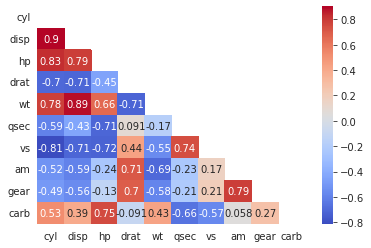

In [7]:
sns.set_style("whitegrid")
mask = np.triu(np.ones_like(X.corr()))
corr = sns.heatmap(X.corr(), annot=True, cmap='coolwarm', mask=mask)

In [ ]:
#  Feature selection:  The correlation matrix above shown that there are high correlation ( >0.70 ) between features:
#  (cyl: vs, wt, drat, hp, disp)
#  (hp: carb, vs, qsec)
#  (drat: gear, am, wt)
#  We have to choose just one feature from each group to prevent multicollinearity. If we combine the method with p-value and consider VIF.

In [8]:
vif_factor['p-values']=est.pvalues[1:]
vif_factor

,VIF,p-values
cyl,112.629828,0.916087
disp,98.930791,0.463489
hp,56.047781,0.334955
drat,132.214353,0.635278
wt,182.948049,0.063252
qsec,317.534376,0.273941
vs,8.752581,0.881423
am,7.412020,0.233990
gear,119.804879,0.665206
carb,32.213836,0.812179


In [ ]:
#  Measured between VIF and p-values, the feature sets least impacted by multicollinearity are:

#  (cyl: vs, wt, drat, hp, disp) -> wt (the lowest p-value)
#  (hp: carb, vs, qsec) -> qsec (the lowest p-value)
#  (drat: gear, am, wt) -> am, wt (even if drat-am and drat-wt are highly correlated, but am-wt is not)

In [9]:
# Rebuild Multiple Linear Regression model with independent variables least affected by multicollinearity wt, qsec, am 
X3 = X2[['const','wt','qsec','am']]
est2 = sm.OLS(Y, X3).fit()
print(est2.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.834   
Dependent Variable: mpg              AIC:                152.1194
Date:               2022-03-25 09:47 BIC:                157.9823
No. Observations:   32               Log-Likelihood:     -72.060 
Df Model:           3                F-statistic:        52.75   
Df Residuals:       28               Prob (F-statistic): 1.21e-11
R-squared:          0.850            Scale:              6.0459  
-------------------------------------------------------------------
           Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
-------------------------------------------------------------------
const      9.6178     6.9596    1.3819   0.1779   -4.6383   23.8739
wt        -3.9165     0.7112   -5.5069   0.0000   -5.3733   -2.4597
qsec       1.2259     0.2887    4.2467   0.0002    0.6346    1.8172
am         2.9358     1.4109    2.0808   0.0467    0.0457    5.8259
-------------

In [ ]:
#  This results in a better model, with Adjusted R-squared being higher at 83.4% (compared to 80.7%). 
#  Multicollinearity is already handled and all the variables are statistically significant (p-value < 0.05).

In [ ]:
#  Other ways to handling multicollinearity are:

#  1.  Use centred variables for example use  𝑋𝑖−𝑋 mean  instead of  𝑋𝑖 , or any other transformation
#  2.  Apply Principal Component Analysis (PCA) to reduce features to a smaller set of uncorrelated (orthogonal) components.

In [ ]:
# =================================== Residual Analysis (to see if normally distributed) ============================================

<Figure size 432x288 with 0 Axes>

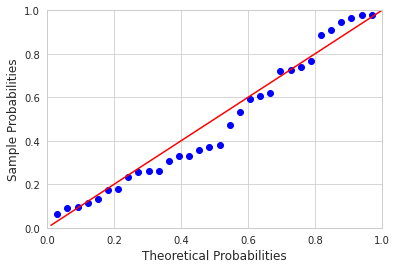

In [10]:
# Test for Normal Distribution of Residuals
probplot = sm.ProbPlot(est2.resid)
plt.figure()
probplot.ppplot(line='45')
plt.show()

In [ ]:
# =================================== Homoscedasticity Test (Residuals do not vary with x) ============================================

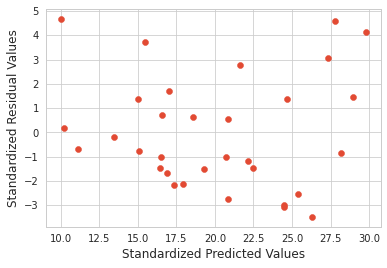

In [11]:
def standardized_values(vals):
    return (vals - vals.mean())/vals.std()
plt.scatter(est2.fittedvalues, est2.resid)
plt.xlabel("Standardized Predicted Values")
plt.ylabel("Standardized Residual Values")
plt.show()

In [ ]:
# The residuals are very random and do not follow any pattern. This means the residuals have constant variance (homoscedasticity)

In [ ]:
# =================================== Checks for outliers in independent (x) values  ============================================

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


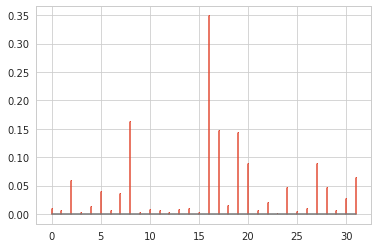

In [12]:
mlr_inf = est2.get_influence()
(c, p) = mlr_inf.cooks_distance
plt.stem(np.arange(len(X)), np.round(c, 3), markerfmt=',')
plt.show()

In [ ]:
#  There is no outlier in this dataset from final model because Cook’s distance for all the data points is less than 1.